# Regression between sea level height and the dangendorf wind proxies for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [104]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs
from code import practical_functions as pf

data_type = 'historical'
model = 'Dangendorf'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [105]:
# Open data file
zos = imprt.import_cmip6_slh_data()

In [106]:
zos

<xarray.Dataset>
Dimensions:  (model: 51, station: 7, time: 165)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2010 2011 2012 2013 2014
  * station  (station) object 'Vlissingen' 'Hoek v. Holland' ... 'Average'
Data variables:
    zos      (station, model, time) float64 ...

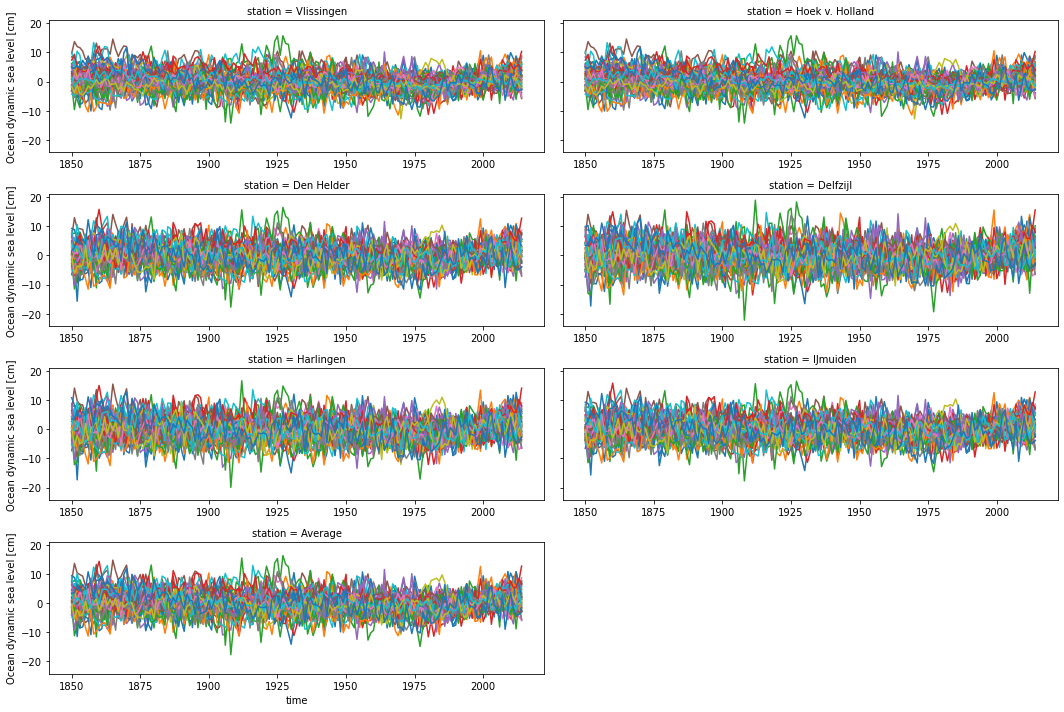

In [107]:
figs.plot_zos_data(zos, data_type)

#### Import and plot nearby wind data

In [108]:
pres_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

In [109]:
pres_data

<xarray.Dataset>
Dimensions:               (model: 56, time: 165)
Coordinates:
  * model                 (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * time                  (time) int64 1850 1851 1852 1853 ... 2012 2013 2014
Data variables:
    Negative corr region  (model, time) float64 9.974e+04 ... 9.974e+04
    Positive corr region  (model, time) float64 9.758e+04 ... 9.758e+04

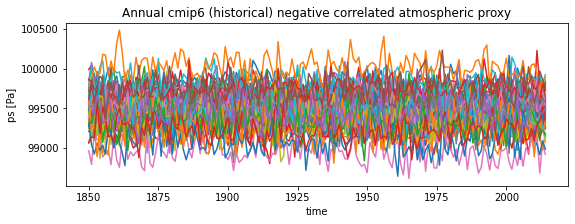

In [110]:
figs.plot_cmip6_pres_data(pres_data, 'Negative corr region', model, data_type)

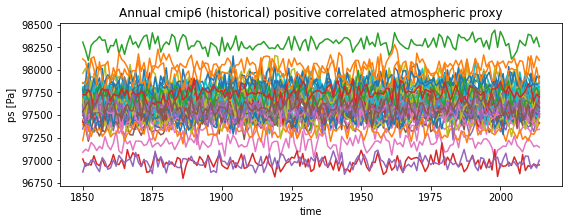

In [111]:
figs.plot_cmip6_pres_data(pres_data, 'Positive corr region', model, data_type)

In [112]:
pres_data

<xarray.Dataset>
Dimensions:               (model: 56, time: 165)
Coordinates:
  * model                 (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
  * time                  (time) int64 1850 1851 1852 1853 ... 2012 2013 2014
Data variables:
    Negative corr region  (model, time) float64 9.974e+04 ... 9.974e+04
    Positive corr region  (model, time) float64 9.758e+04 ... 9.758e+04

### Perform regression

In [113]:
results, timeseries = regres.regression_cmip6(pres_data, zos, wind_model = model, data_type = data_type)

In [114]:
timeseries 

<xarray.Dataset>
Dimensions:          (model: 50, station: 7, time: 165)
Coordinates:
  * time             (time) int64 1850 1851 1852 1853 ... 2011 2012 2013 2014
  * station          (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model            (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
Data variables:
    neg_corr_region  (model, station, time) float64 0.2663 0.09966 ... 0.1304
    pos_corr_region  (model, station, time) float64 -1.078 0.3168 ... -0.08166
    trend            (model, station, time) float64 -2.004 -1.98 ... -4.079
    total            (model, station, time) float64 -2.816 -1.563 ... -4.03
    wind_total       (model, station, time) float64 -0.8114 0.4164 ... 0.04875

In [115]:
results

<xarray.Dataset>
Dimensions:          (model: 50, station: 7)
Coordinates:
  * station          (station) <U15 'Vlissingen' 'Hoek v. Holland' ... 'Average'
  * model            (model) object 'ACCESS-CM2' ... 'UKESM1-0-LL'
Data variables:
    r2               (model, station) float64 0.1746 0.1746 ... 0.6944 0.6704
    r2_wind          (model, station) float64 0.08614 0.08614 ... 0.5051 0.4053
    r2_u2            (model, station) float64 0.04079 0.04079 ... 0.4678 0.3658
    r2_v2            (model, station) float64 0.08391 0.08391 ... 0.2698 0.2356
    rmse             (model, station) float64 3.553 3.553 3.682 ... 2.675 2.638
    constant         (model, station) float64 0.3237 0.3237 ... -0.03851 0.327
    neg_corr_region  (model, station) float64 -0.4298 -0.4298 ... -2.481 -1.927
    pos_corr_region  (model, station) float64 0.9004 0.9004 ... 1.262 1.265
    trend            (model, station) float64 1.164 1.164 ... -2.109 -2.369

#### Plot regression results

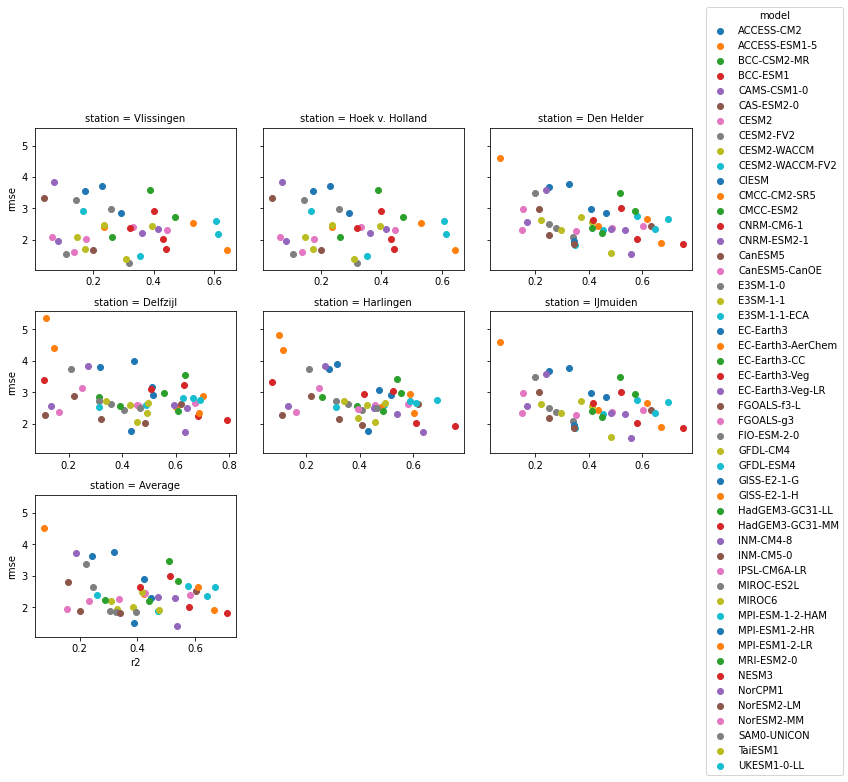

In [116]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type)

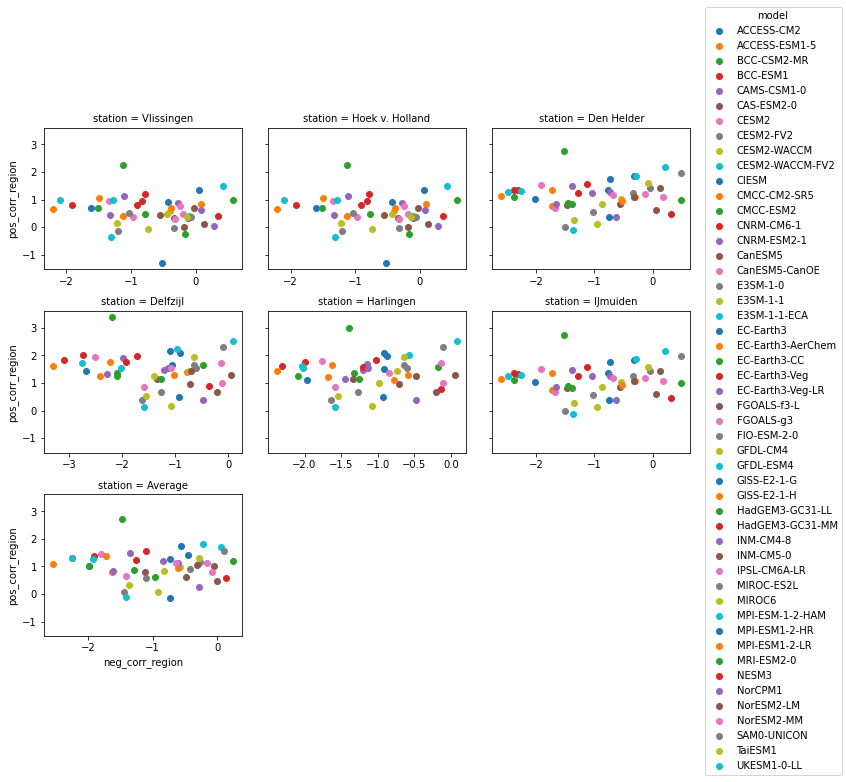

In [117]:
figs.plot_cmip6_two_variables(results, 'neg_corr_region', 'pos_corr_region', data_type)

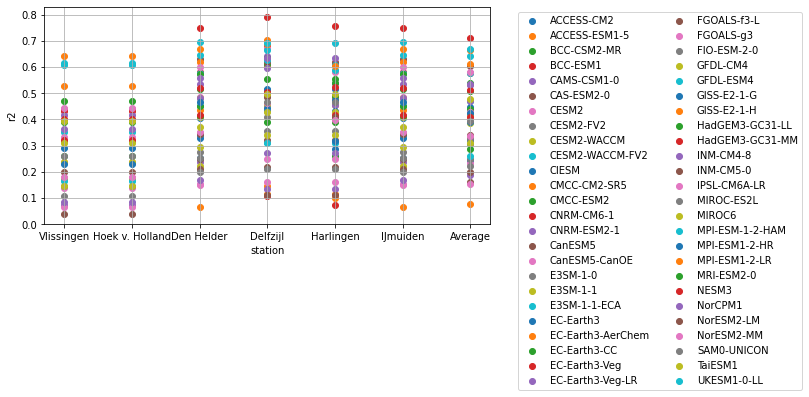

In [118]:
figs.plot_cmip6_result_per_station(results, 'r2', data_type)

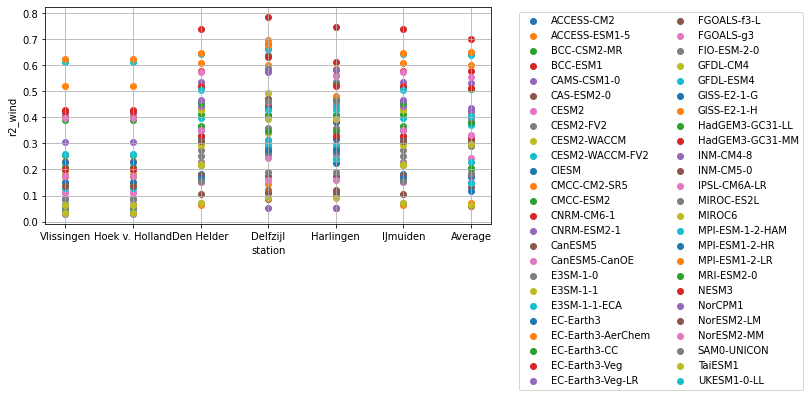

In [119]:
figs.plot_cmip6_result_per_station(results, 'r2_wind', data_type)

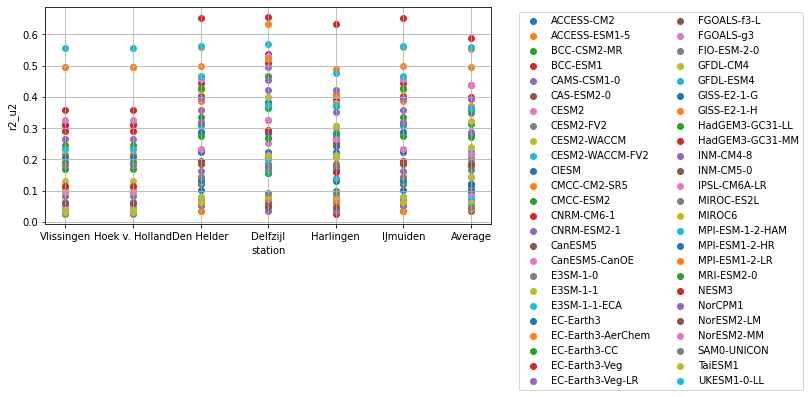

In [120]:
figs.plot_cmip6_result_per_station(results, 'r2_u2', data_type)

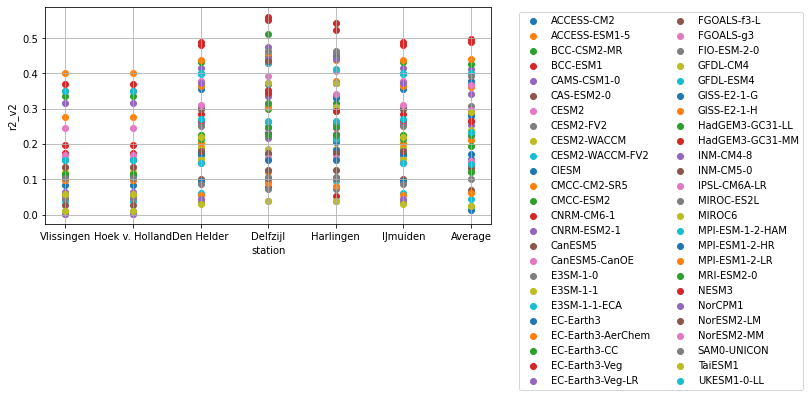

In [121]:
figs.plot_cmip6_result_per_station(results, 'r2_v2', data_type)

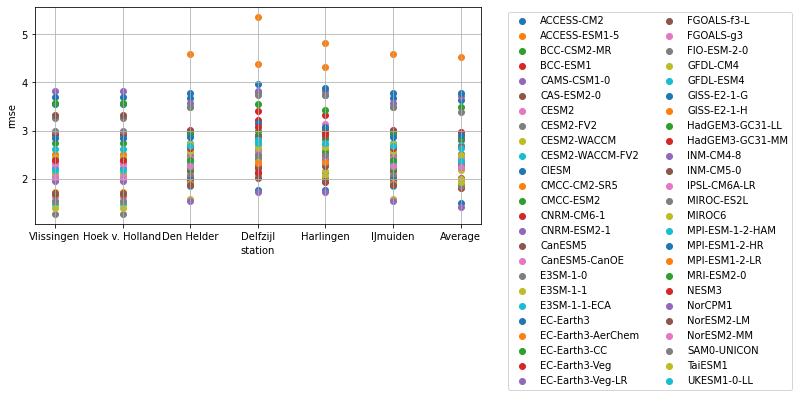

In [122]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type)

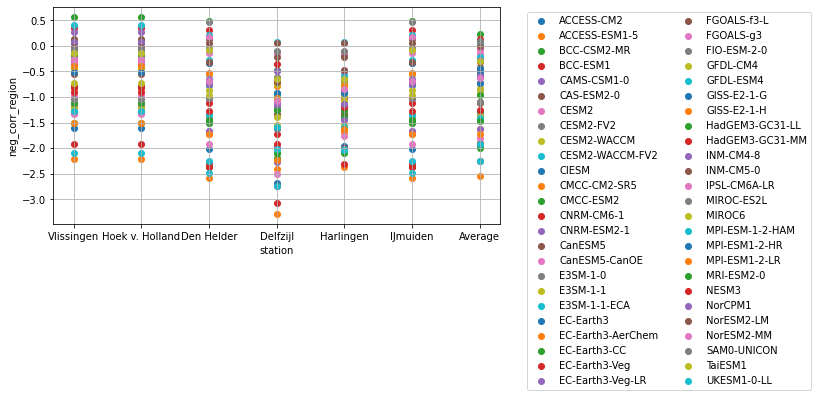

In [123]:
figs.plot_cmip6_result_per_station(results, 'neg_corr_region', data_type)

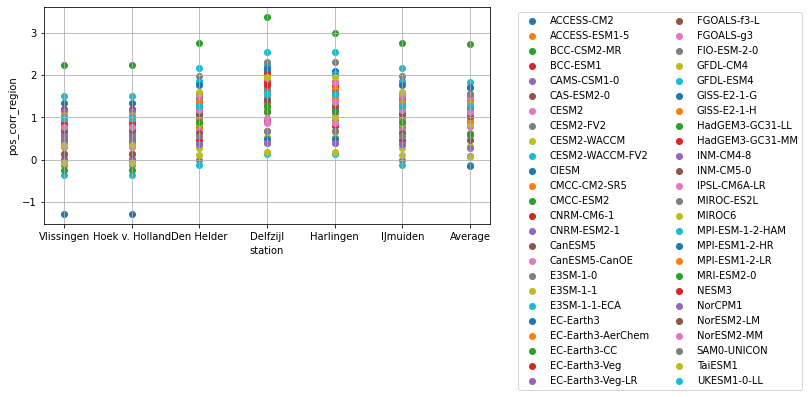

In [124]:
figs.plot_cmip6_result_per_station(results, 'pos_corr_region', data_type)

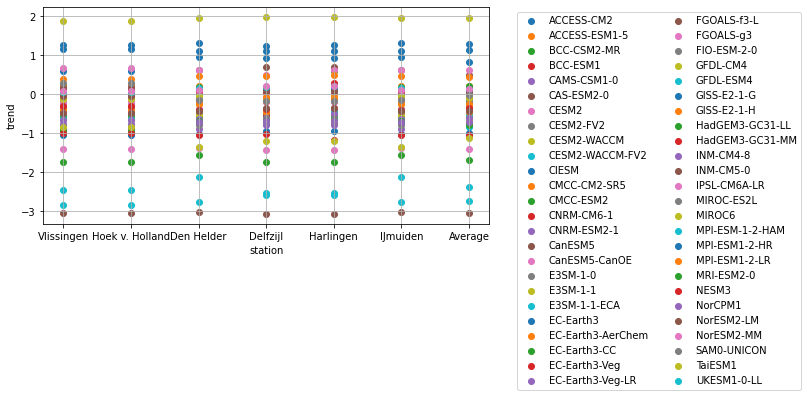

In [125]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type)

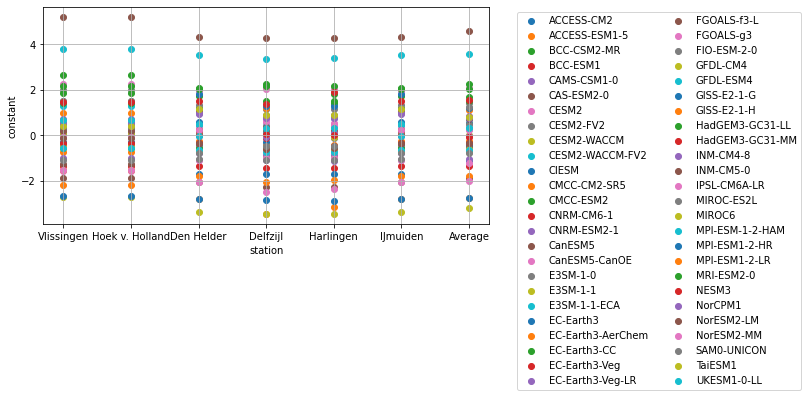

In [126]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type)

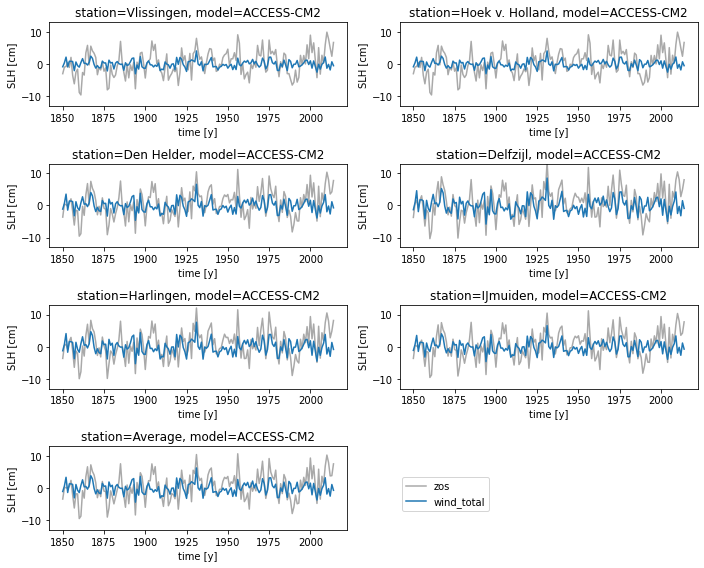

In [127]:
figs.timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['wind_total'])

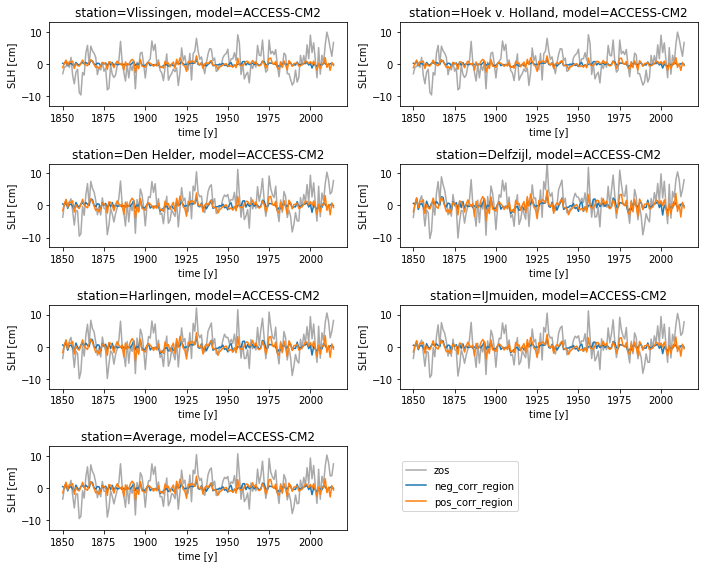

In [128]:
figs.timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['neg_corr_region', 'pos_corr_region'])

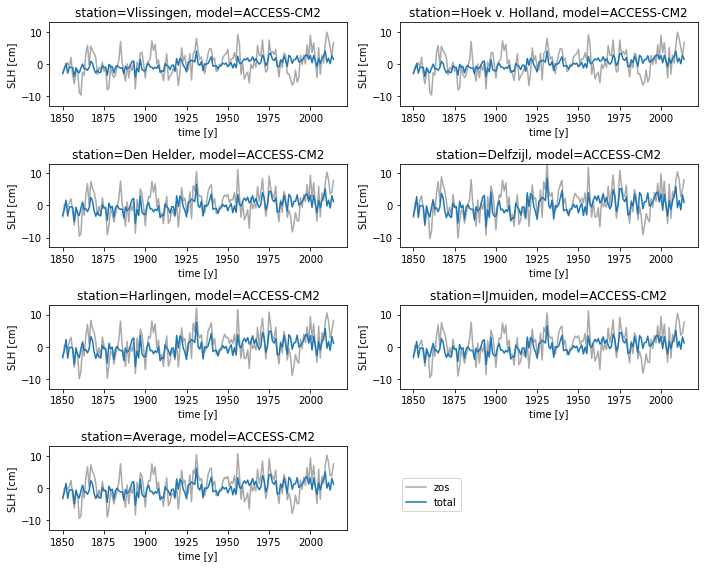

In [129]:
figs.timeseries_per_station_one_model(zos, timeseries, timeseries.model.values[0], var = ['total'])

#### Plot trends